In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Mục mới

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/HousingPrices-Amsterdam-August-2021.csv")
df.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [ ]:
df.isna().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [ ]:
# Remove missing values.
df = df.dropna()
df.isna().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         0
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [ ]:
# import re
# def process_zipcode(text):
#   text = re.sub("\D","",text)
#   return text

In [ ]:

df = df [['Price','Area','Room','Lon','Lat']]

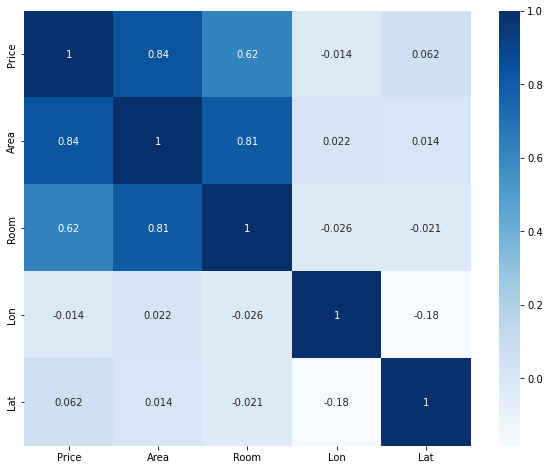

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
sns.heatmap(data=df.corr(),cmap="Blues",annot=True);
plt.show()

In [ ]:
# Theo biểu đồ thì thuộc tính "Area" và "Room" là thích hợp nhất
X = df[["Area","Room"]]
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_preds = lm.predict(X_test)
data = pd.DataFrame({"y":y_test,"y predicts":y_preds})
data

,y,y predicts
320,1249000.0,1.996025e+06
379,550000.0,7.045886e+05
540,215000.0,2.243776e+05
297,280000.0,5.924570e+05
533,350000.0,2.679322e+05
...,...,...
449,335000.0,2.766432e+05
422,270000.0,5.477920e+05
134,685000.0,1.308973e+06
492,350000.0,5.390811e+05


In [ ]:
print("Mean Square Error:",np.sqrt(metrics.mean_squared_error(y_test,y_preds)))

Mean Square Error: 242179.61043090536


In [ ]:
print("Score:",lm.score(X_test,y_test))

Score: 0.7805495669757281
